## IV. SIRを書く(1)————シンプルなSIR

(完全版: <https://colab.research.google.com/drive/17XoCUWzPlk3SU0rwduAaEh3kqqOGXuxJ?usp=sharing>)

- `S`，`I`，`R`
  - 連続値なので小数点以下がある: `float`
  - 複数のグループがある: `np.array`
  - 時系列: `list`に入れる
  - 初期値:
    - `S`，`I`，`R`には初期値を与える必要がある
      - `S`: 総人口ではなく割合と考えて，すべて1とする
      - `I`: 適当な割合を入れる
      - `R`の初期値は計算に影響しないので，通常はゼロベクトルとする

- 便利のため`ZEROS`，`ONES`を作っておく:
  - それぞれゼロベクトル，1ベクトル．`GROUPS`ベクトルと同じshape

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#基本設定
TMAX=100
GROUPS=["A","B","C"]
ONES=np.ones_like(GROUPS, dtype=np.float64)
ZEROS=np.zeros_like(GROUPS, dtype=np.float64)

#SIRモデル変数初期値
S=[ONES]
I=[np.array([0.001,0.0,0.0])]
R=[ZEROS]



### パラメーターβ，γ，R0

- パラメーターβ，γ，R0を与える必要がある

- γは共通でもよい(それほど差が出ないと思われるので)
- β，R0は通常グループごとに設定する(そうしないとグループ間の差が生まれない)
- βを行列にした場合は，接触したSとIの組み合わせごとに接触割合を設定できる
- `*`は，
  - 行列またはベクトル同士のときはアダマール積といい，要素同士の積を計算する(内積ではない)
  - 行列またはベクトルとスカラーのときはスカラー倍になる

In [4]:
#SIRモデル定数
R0=1.0
γ=ONES*1/15
β=ONES*R0*γ
print("γ",γ)
print("β",β)

γ [0.06666667 0.06666667 0.06666667]
β [0.06666667 0.06666667 0.06666667]


### 関数

関数を2つに分ける(今回の場合わけなくていいかも)．

`calc()`のように，引数だけで計算し，返すことで，意図しない書き換えから保護するテクニックがある．実際`S`．`I`，`R`が一番外側(グローバル)で定義されているので，どこからでも書き換えられるけど，あんまりよろしくない．

```
def calc(s, i ,r):
    ……

def run(TMAX=100):
    ……
```

In [5]:
def calc(s, i ,r):
    #差分の計算
    ds=-β*s*sum(i)/len(GROUPS) #グループに関係なく接触
    #ds=-β*s*i #グループ同士が接触しない
    dr=γ*i
    di=-ds-dr

    #差分を適用した値を返す
    return s+ds, i+di, r+dr

`,`(カンマ)は`tuple`というコレクション型を返す特殊な関数．使ってまとめて3つを返している．Python特有のテクニック．

In [6]:
def run():
    s=S[-1]
    i=I[-1]
    r=R[-1]
    for t in range(0,TMAX-1):
        s,i,r=calc(s,i,r)
        S.append(s)
        I.append(i)
        R.append(r)

`run()`をくり返し呼ぶと，100回ずつ追加でシミュレーションができる．[ランタイム]→[再起動してすべてのセルを実行]すると，初期状態に戻せる．

In [7]:
run()

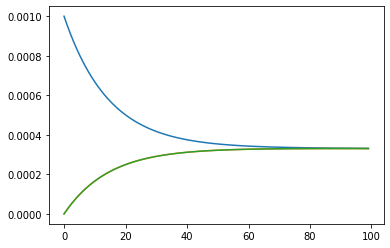

In [20]:
def plotdata(V):
    plt=[[],[],[]]
    for v in V:
        plt[0].append(v[0])
        plt[1].append(v[1])
        plt[2].append(v[2])
    return plt

def plotall():
    s=plotdata(S)
    i=plotdata(I)
    r=plotdata(R)
    #plt.plot(s[0])
    #plt.plot(s[1])
    #plt.plot(s[2])
    plt.plot(i[0])
    plt.plot(i[1])
    plt.plot(i[2])
    #plt.plot(r[0])
    #plt.plot(r[1])
    #plt.plot(r[2])
    plt.show()

plotall()

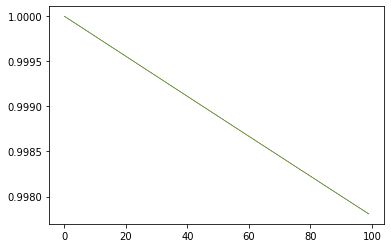

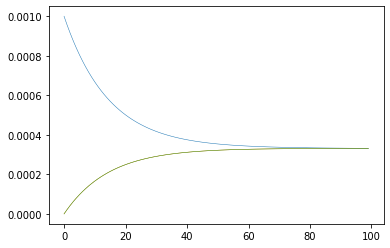

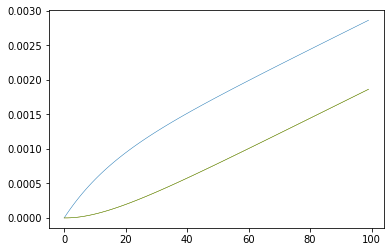

In [17]:
#plt.plot(np.array(S))

for k,_ in enumerate(GROUPS):
    plt.plot([s[k] for s in S], label="S", linewidth=.5)
    s=S[t][k]
    sはnp.array([0,0,0])
    s[0]

plt.show()

for k,g in enumerate(GROUPS):
    plt.plot([s[k] for v in I], label="I", linewidth=.5)
plt.show()

for k,g in enumerate(GROUPS):
    plt.plot([s[k] for v in R], label="R", linewidth=.5)
plt.show()


${x|x\in R}$

In [16]:

for k,g in enumerate(GROUPS):
    print(k,g)
for g in GROUPS:
    print(g)


0 A
1 B
2 C
A
B
C
